In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 참고코드

In [ ]:
# def hist_top_bottom_10(df, column):
#     top_10_other_juris_move_cnt_m = df.groupby('station_nm')[column].mean().nlargest(10)
#     bottom_10_other_juris_move_cnt_m = df.groupby('station_nm')[column].mean().nsmallest(10)

#     top_10_other_juris_move_cnt_m = top_10_other_juris_move_cnt_m.apply(lambda x: f"{x:.2f}")
#     bottom_10_other_juris_move_cnt_m = bottom_10_other_juris_move_cnt_m.apply(lambda x: f"{x:.2f}")

#     # Convert to DataFrames and reset the index
#     top_10_other_juris_move_cnt_m = top_10_other_juris_move_cnt_m.reset_index()
#     bottom_10_other_juris_move_cnt_m = bottom_10_other_juris_move_cnt_m.reset_index()

#     # Rename the columns
#     top_10_other_juris_move_cnt_m.columns = ['서/센터', '평균']
#     bottom_10_other_juris_move_cnt_m.columns = ['서/센터', '평균']

#     # Create a figure with 1 row and 3 columns (for side-by-side plots)
#     fig, axes = plt.subplots(1, 3, figsize=(16, 5))  # Adjusted for better width

#     # Plot the histogram on the first subplot
#     sns.histplot(data=df, x=column, kde=True, ax=axes[0])
#     axes[0].set_title(column)
#     axes[1].set_title('상위 10개 소방서')
#     axes[2].set_title('하위 10개 소방서')


#     # Turn off axes for the table plots
#     axes[1].axis('tight')
#     axes[1].axis('off')
#     axes[2].axis('tight')
#     axes[2].axis('off')

#     # Create the first table for top 10
#     table_top = axes[1].table(cellText=top_10_other_juris_move_cnt_m.values,
#                             colLabels=top_10_other_juris_move_cnt_m.columns,
#                             cellLoc='center',
#                             loc='center',
#                             colWidths=[0.5, 0.5])  # Adjust column widths

#     # Create the second table for bottom 10
#     table_bottom = axes[2].table(cellText=bottom_10_other_juris_move_cnt_m.values,
#                                 colLabels=bottom_10_other_juris_move_cnt_m.columns,
#                                 cellLoc='center',
#                                 loc='center',
#                                 colWidths=[0.5, 0.5])  # Adjust column widths

#     # Adjust the font size for both tables
#     table_top.auto_set_font_size(False)
#     table_top.set_fontsize(12)
#     table_bottom.auto_set_font_size(False)
#     table_bottom.set_fontsize(12)

#     # Scale both tables to adjust the row heights
#     table_top.scale(1, 2)  # Adjust height for the top table
#     table_bottom.scale(1, 2)  # Adjust height for the bottom table

#     # Make the header rows bold for both tables
#     for (i, j), cell in table_top.get_celld().items():
#         if i == 0:
#             cell.set_text_props(fontweight='bold')

#     for (i, j), cell in table_bottom.get_celld().items():
#         if i == 0:
#             cell.set_text_props(fontweight='bold')

#     # Adjust layout for better spacing
#     plt.tight_layout()
#     plt.show()

# 이상치 처리

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v1(EDA).csv')
df.shape

(39516, 22)

In [ ]:
df.head()

,AGE_GRP,GENDER,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,MVMN_NM,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,...,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,DGSTFN,TRAVEL_MONTH,TRAVEL_PERIOD,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2
0,60.0,여,2,1,2,2,57100.0,대중교통 등,7.0,8.0,...,수도국산 달동네박물관,인천 동구 솔빛로 51,인천 동구 송현동 163,126.639136,37.477481,5.0,10,3,13,3
1,60.0,여,2,1,2,2,57100.0,대중교통 등,7.0,8.0,...,인천내리교회,인천 중구 우현로67번길 3-1,인천 중구 내동 29,126.628812,37.473755,5.0,10,3,13,3
2,60.0,여,2,1,2,2,57100.0,대중교통 등,7.0,8.0,...,부평문화의거리,인천 부평구 광장로 6,인천 부평구 부평동 224-1,126.724278,37.494163,4.0,10,3,13,3
3,60.0,여,2,1,2,2,57100.0,대중교통 등,7.0,8.0,...,인천배다리헌책방거리,NaN,인천 동구 금곡동 87-6,126.636406,37.472559,4.0,10,3,13,3
4,60.0,여,2,1,2,2,57100.0,대중교통 등,7.0,8.0,...,인천개항장 근대건축전시관,인천 중구 신포로23번길 77,인천 중구 중앙동2가 24-1,126.621165,37.472945,5.0,10,3,13,3


* 결측치

In [ ]:
df['MVMN_NM'] = df['MVMN_NM'].fillna('대중교통 등')

In [ ]:
df.isnull().sum()

,0
AGE_GRP,0
GENDER,0
NTvsCT,0
EXPLODvsCHPLOD,0
RESTvsACT,0
UNKvsK,0
budget,0
MVMN_NM,0
TRAVEL_MOTIVE_1,0
TRAVEL_MOTIVE_2,0


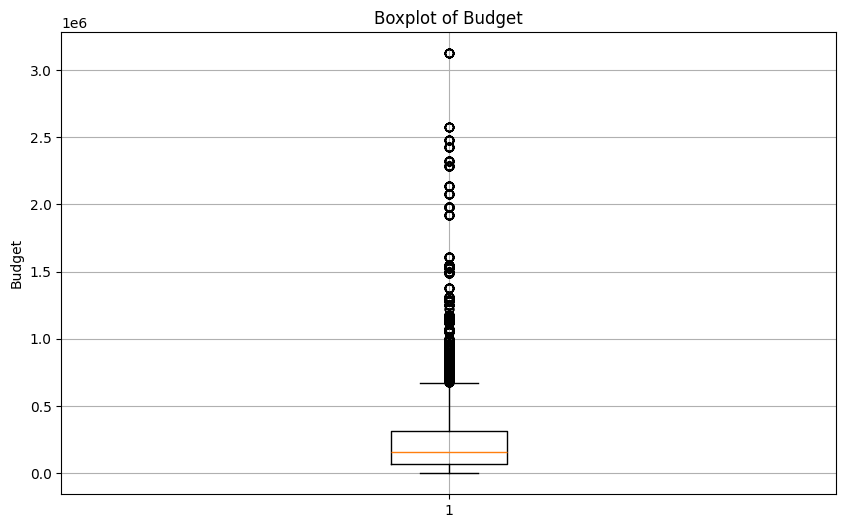

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df['budget']) # 3배수 IQR
plt.title('Boxplot of Budget')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

In [ ]:
df = df.loc[df['budget'] < 1500000]

In [ ]:
df.shape

(39135, 22)

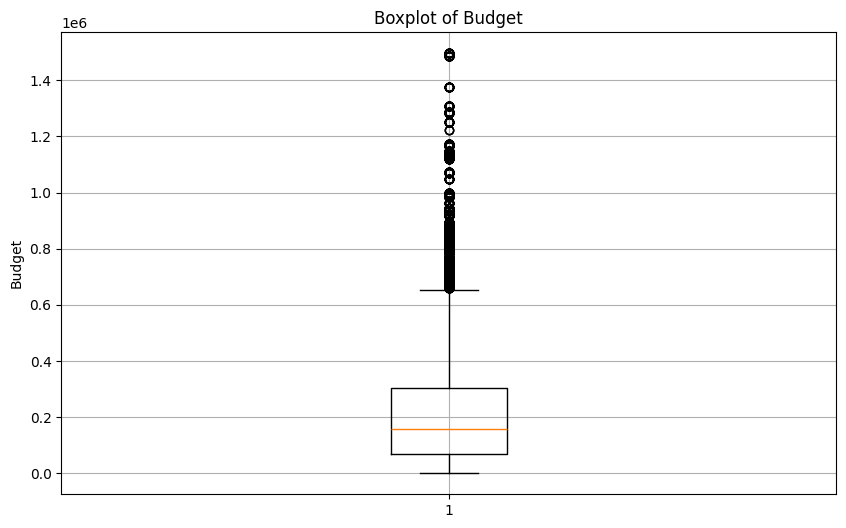

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df['budget']) # 3배수 IQR
plt.title('Boxplot of Budget')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

In [ ]:
df = df.loc[df['budget'] < 1400000]

In [ ]:
df.shape

(39063, 22)

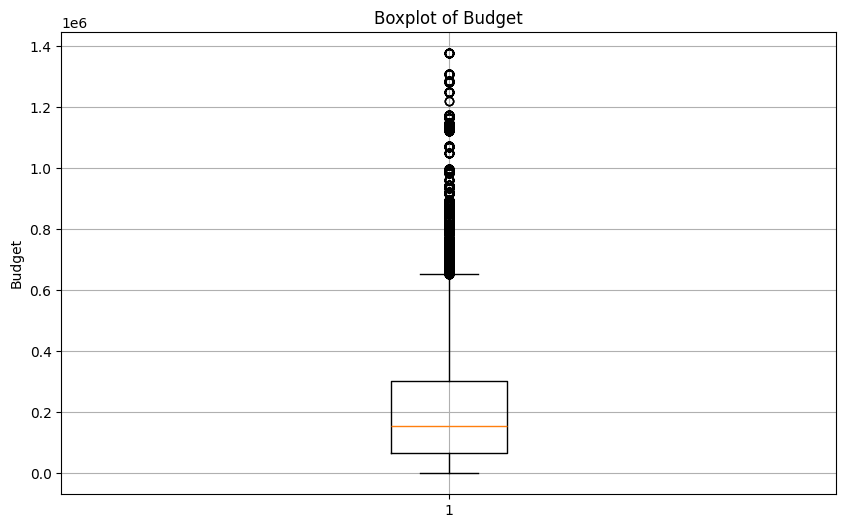

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df['budget']) # 3배수 IQR
plt.title('Boxplot of Budget')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

* 직장인 평균 월급 355만원.

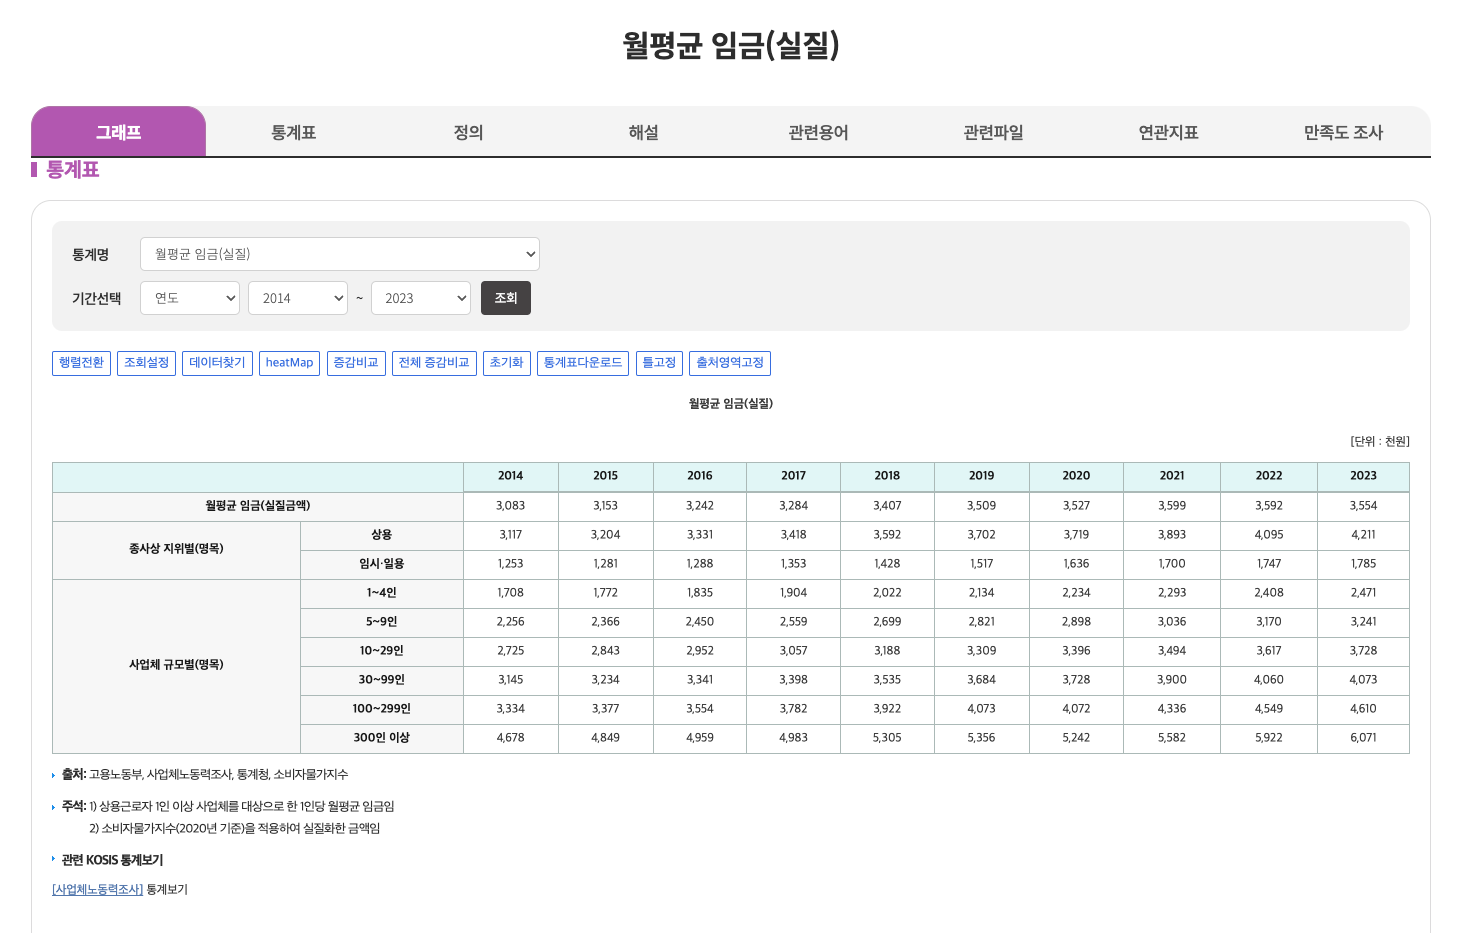

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39063 entries, 0 to 39515
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE_GRP                39063 non-null  float64
 1   GENDER                 39063 non-null  object 
 2   NTvsCT                 39063 non-null  int64  
 3   EXPLODvsCHPLOD         39063 non-null  int64  
 4   RESTvsACT              39063 non-null  int64  
 5   UNKvsK                 39063 non-null  int64  
 6   budget                 39063 non-null  float64
 7   MVMN_NM                39063 non-null  object 
 8   TRAVEL_MOTIVE_1        39063 non-null  float64
 9   TRAVEL_MOTIVE_2        39063 non-null  float64
 10  TRAVEL_MOTIVE_3        39063 non-null  float64
 11  VISIT_AREA_TYPE_CD     39063 non-null  float64
 12  VISIT_AREA_NM          39063 non-null  object 
 13  ROAD_NM_ADDR           32300 non-null  object 
 14  LOTNO_ADDR             36267 non-null  object 
 15  X_COORD

In [ ]:
df = df.loc[df['budget'] != 0]

In [ ]:
df['budget'].describe()

,budget
count,3.876000e+04
mean,2.254551e+05
std,2.189802e+05
min,7.000000e+02
25%,6.930000e+04
50%,1.577000e+05
75%,3.040000e+05
max,1.377263e+06


In [ ]:
df_upper_down = df.loc[df['budget'] < 1000000]

In [ ]:
df_upper_down['budget'].describe()

,budget
count,38347.000000
mean,215034.254309
std,195408.002863
min,700.000000
25%,68500.000000
50%,155800.000000
75%,296434.000000
max,998900.000000


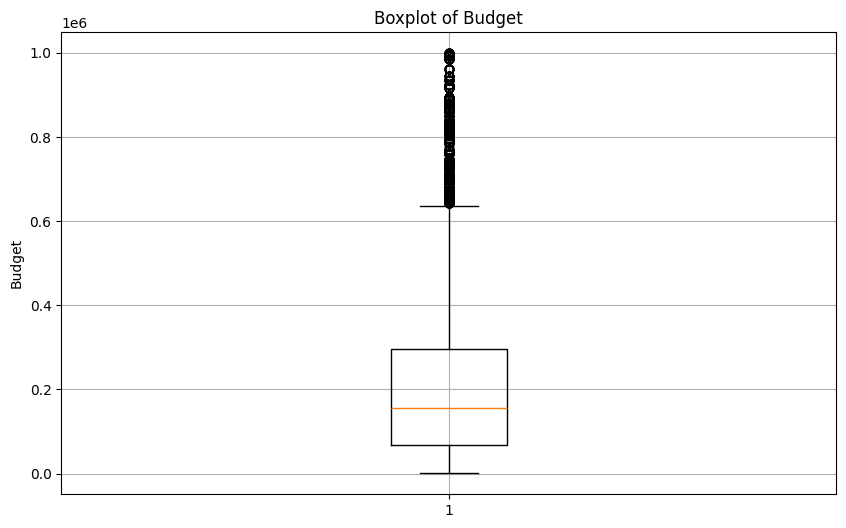

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df_upper_down['budget']) # 3배수 IQR
plt.title('Boxplot of Budget')
plt.ylabel('Budget')
plt.grid(True)
plt.show()

In [ ]:
df_upper_down.shape

(38347, 22)

# 예산대 범주형

In [ ]:
# # 구간 정의 (0만원에서 900만원까지는 10만원 단위, 1000만원 이상은 1000만원 단위로 구간 생성)
# bins = list(range(0, 1000000, 100000)) + list(range(1000000, 16000000 + 1000000, 1000000))

# # 구간에 따른 라벨 정의 (첫 번째 구간만 '10만원 이하'로 설정)
# labels = ['10만원 이하'] + [f"{i*10}만원대" for i in range(1, 10)] + [f"{i}만원대" for i in range(100, 1600, 100)]

# # 예산을 구간별로 나누고, 각 구간에 이름 붙이기
# df['budget'] = pd.cut(df['budget'], bins=bins, labels=labels, right=False)
# df.head()

In [ ]:
# df['budget'].value_counts()

#### --code--

In [221]:
cd = pd.read_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/압축해제/train/tc_codeb_코드B.csv')
cd.head()

,idx,cd_a,cd_b,cd_nm,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
0,1055,ACT,1,취식,NaN,NaN,N,10,2022-07-05 11:34:29,NaN
1,1056,ACT,2,쇼핑 / 구매,(아이 쇼핑 포함)<br>* 이전 방문지에서 해당 방문지 이동 중 구매한 내역 포함,NaN,N,20,2022-07-05 11:49:08,NaN
2,1057,ACT,3,체험 활동 / 입장 및 관람,NaN,NaN,N,30,2022-07-05 11:49:37,NaN
3,1058,ACT,4,단순 구경 / 산책 / 걷기,NaN,NaN,N,40,2022-07-05 11:49:43,NaN
4,1059,ACT,5,휴식,NaN,NaN,N,50,2022-07-05 11:49:48,NaN


In [222]:
cd[cd['cd_a'] == 'VIS']

,idx,cd_a,cd_b,cd_nm,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
221,1088,VIS,21,집,NaN,NaN,N,999,2022-07-05 15:52:47,NaN
222,1089,VIS,22,친구/친지집,NaN,NaN,N,999,2022-07-05 15:52:56,2022-07-26 16:05:56
223,1090,VIS,23,사무실,NaN,NaN,N,999,2022-07-05 15:53:05,NaN
224,1091,VIS,24,숙소,NaN,NaN,N,999,2022-07-05 15:53:12,NaN
225,1095,VIS,13,체험 활동 관광지,NaN,NaN,N,15,2022-07-14 15:14:57,NaN
226,1002,VIS,1,자연관광지,NaN,NaN,N,10,2022-07-05 10:48:17,NaN
227,1003,VIS,2,"역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",NaN,NaN,N,20,2022-07-05 10:48:24,NaN
228,1005,VIS,3,"문화 시설(공연장, 영화관, 전시관 등)",NaN,NaN,N,30,2022-07-05 11:23:34,NaN
229,1006,VIS,4,"상업지구(거리, 시장, 쇼핑시설)",NaN,NaN,N,40,2022-07-05 11:23:39,NaN
230,1007,VIS,5,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",NaN,NaN,N,50,2022-07-05 11:23:47,NaN


In [ ]:
cd[cd['cd_a'] == 'MIS']

,idx,cd_a,cd_b,cd_nm,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
95,1097,MIS,1,쇼핑,NaN,NaN,N,999,2022-07-27 16:26:52,NaN
96,1098,MIS,2,"테마파크, 놀이시설, 동/식물원 방문",NaN,NaN,N,999,2022-07-27 16:26:58,NaN
97,1099,MIS,3,역사 유적지 방문,NaN,NaN,N,999,2022-07-27 16:27:03,NaN
98,1100,MIS,4,시티투어,NaN,NaN,N,999,2022-07-27 16:27:08,NaN
99,1101,MIS,5,"야외 스포츠, 레포츠 활동",NaN,NaN,N,999,2022-07-27 16:27:14,NaN
100,1102,MIS,6,지역 문화예술/공연/전시시설 관람,NaN,NaN,N,999,2022-07-27 16:27:19,NaN
101,1103,MIS,7,유흥/오락(나이트라이프),NaN,NaN,N,999,2022-07-27 16:27:26,NaN
102,1104,MIS,8,캠핑,NaN,NaN,N,999,2022-07-27 16:27:31,NaN
103,1105,MIS,9,지역 축제/이벤트 참가,NaN,NaN,N,999,2022-07-27 16:27:37,NaN
104,1106,MIS,10,온천/스파,NaN,NaN,N,999,2022-07-27 16:27:43,NaN


In [ ]:
cd[cd['cd_a'] == 'TTM']

,idx,cd_a,cd_b,cd_nm,cd_memo,cd_memo2,del_flag,order_num,ins_dt,edit_dt
217,1161,TTM,1,1주일,NaN,NaN,N,999,2022-09-22 17:34:50,NaN
218,1162,TTM,2,한달,NaN,NaN,N,999,2022-09-22 17:34:50,NaN
219,1163,TTM,3,1년,NaN,NaN,N,999,2022-09-22 17:34:50,NaN
220,1164,TTM,4,기타,NaN,NaN,N,999,2022-09-22 17:34:50,NaN


### 2-2-n-1.

In [ ]:
df.loc[df['budget'] > 10000000].shape

(0, 22)

- 1천만원을 넘어가는 여행로그는 총 611개로 3만 2천개 데이터에서 많진 않지만 적지도 않은 비중을 차지하고 있다고 생각함.

- 611개로그에 해당하는 여행객들이 추구하는 가성비 여행 예산대를 정확하게 잡기 모호하다.

- 하지만, 원래 모든 예산을 2천만원 가량 잡아야 하는 여행이 1천만원으로 바뀐다면 ? -> 이것 또한 가성비라고 생각할 수 있지 않을까.

- 비수기 여행/프로모션 및 얼리버드 예약 해택/패키지 여행 할인/마일리지와 포인트 활용 등 베네핏을 주로 다루는 것들이 생각보다 많다.

- 결혼을 하지 않고 홀로 살아가는 환경에서 연봉의 절반, 거의 월급의 절반을 지속적으로 여행에 투자할 수 있다고는 받아들일 수 있다.

- 나홀로를 중심으로 바라보기 때문에, 사실상 연봉에 가까운 금액들을 여행에 투자하지 않는다면 이상하다고 생각할 수 없을 것 같다.

### 2-2-3. 기간 이상치 제거.

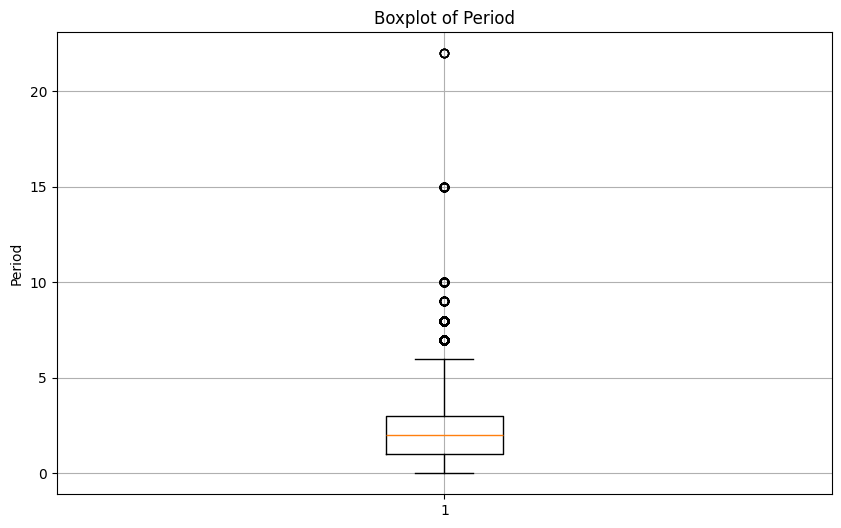

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df_upper_down['TRAVEL_PERIOD'])
plt.title('Boxplot of Period')
plt.ylabel('Period')
plt.grid(True)
plt.show()

In [ ]:
df_upper_down[df_upper_down['TRAVEL_PERIOD'] == 22]

,AGE_GRP,GENDER,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,MVMN_NM,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,...,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,DGSTFN,TRAVEL_MONTH,TRAVEL_PERIOD,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2
10267,20.0,남,2,3,3,1,55000.0,대중교통 등,1.0,7.0,...,군산근대미술관,전북 군산시 해망로 230,전북 군산시 장미동 32,126.712770,35.989953,5.0,10,22,3,6
10268,20.0,남,2,3,3,1,55000.0,대중교통 등,1.0,7.0,...,지린성,전북 군산시 미원로 87,전북 군산시 미원동 78,126.713961,35.979655,5.0,10,22,3,6
10269,20.0,남,2,3,3,1,55000.0,대중교통 등,1.0,7.0,...,자만벽화마을,NaN,전북 전주시 완산구 교동 50-79,127.157185,35.813798,5.0,10,22,3,6
10270,20.0,남,2,3,3,1,55000.0,대중교통 등,1.0,7.0,...,국립전주박물관,전북 전주시 완산구 쑥고개로 249,전북 전주시 완산구 효자동2가 900,127.089657,35.801286,5.0,10,22,3,6
10271,20.0,남,2,3,3,1,55000.0,대중교통 등,1.0,7.0,...,한국닭집,전북 전주시 완산구 풍남문2길 63,전북 전주시 완산구 전동3가 2-242,127.146608,35.812427,5.0,10,22,3,6


- 장기 투숙시 비용도 비용이고, 직장이나 일상생활로 인해 쉽사리 장기적인 여행을 하기 쉽지 않다.

- 22일동안 여행로그도 5개 밖에 되지 않는 것으로 보아, 이상치로 분류되기 가장 좋다.

- 위 22일동안의 장기투숙은 제거하는 것이 바람직하다고 판단.

In [ ]:
df_upper_down = df_upper_down.loc[df_upper_down['TRAVEL_PERIOD'] != 22]

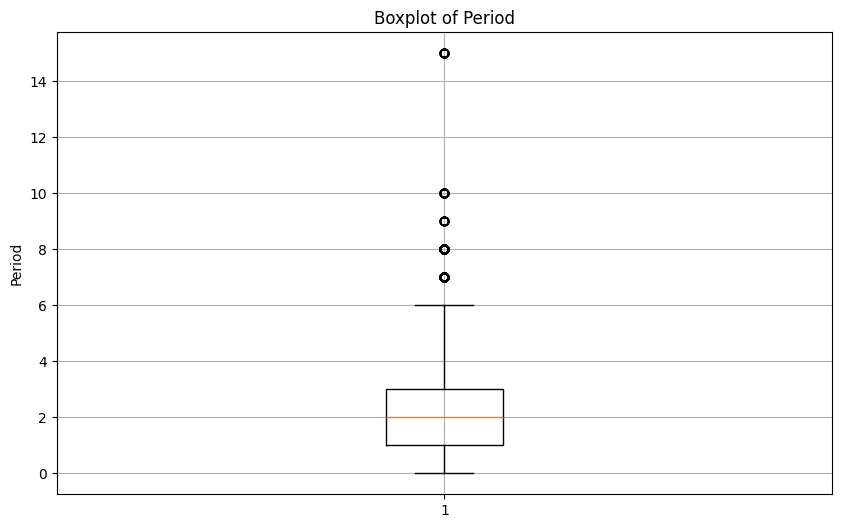

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df_upper_down['TRAVEL_PERIOD'])
plt.title('Boxplot of Period')
plt.ylabel('Period')
plt.grid(True)
plt.show()

In [ ]:
df_upper_down['TRAVEL_PERIOD'].describe()

,TRAVEL_PERIOD
count,38342.000000
mean,2.522847
std,1.462301
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


In [ ]:
df_upper_down = df_upper_down.loc[df_upper_down['TRAVEL_PERIOD'] != 15.0]

- 15일 이상인 이 데이터는, 제주도 한달 살기가 아닌 절반살기 같은 여행으로 추정할 수 있음.

- 저가 숙소를 주로 찾으며 다니는 것으로 보아, 충분히 가능성이 있는 데이터로서 꼽힌다.

In [ ]:
df_upper_down[df_upper_down['TRAVEL_PERIOD'] == 10.0]

,AGE_GRP,GENDER,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,MVMN_NM,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,...,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,DGSTFN,TRAVEL_MONTH,TRAVEL_PERIOD,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2
14825,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,청주국제공항,충북 청주시 청원구 내수읍 오창대로 980,충북 청주시 청원구 내수읍 입상리 88,127.495853,36.722022,4.0,10,10,1,6
14826,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,제주김만복 애월점,제주특별자치도 제주시 애월읍 애월해안로 255,제주특별자치도 제주시 애월읍 고내리 1105-1,126.338970,33.467606,3.0,10,10,1,6
14827,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,집의기록상점,제주특별자치도 제주시 한림읍 귀덕11길 58,제주특별자치도 제주시 한림읍 귀덕리 952-1,126.297009,33.446487,3.0,10,10,1,6
14828,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,클래식문구사,제주특별자치도 제주시 관덕로4길 1-2,제주특별자치도 제주시 삼도이동 965-2,126.521351,33.512624,5.0,10,10,1,6
14829,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,사계생활,제주특별자치도 서귀포시 안덕면 산방로 380,제주특별자치도 서귀포시 안덕면 사계리 2819-1,126.296464,33.231667,4.0,10,10,1,6
14830,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,도체비낭게스트하우스,제주특별자치도 서귀포시 안덕면 사계남로 64-11,제주특별자치도 서귀포시 안덕면 사계리 2325-7,126.297084,33.226102,5.0,10,10,1,6
14831,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,이후북스 제주,제주특별자치도 제주시 관덕로4길 3,제주특별자치도 제주시 삼도이동 964-2,126.521242,33.512584,4.0,10,10,1,6
14832,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,송정농원,제주특별자치도 제주시 연신로 293-13,제주특별자치도 제주시 영평동 2470-8,126.564659,33.480029,3.0,10,10,1,6
14833,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,올레길 10코스(화순-모슬포 올레),NaN,제주특별자치도 서귀포시 대정읍 상모리,126.293210,33.216890,5.0,10,10,1,6
14834,30.0,여,2,2,2,3,667800.0,대중교통 등,4.0,2.0,...,카페멜록,제주특별자치도 제주시 애월읍 애월해안로 251,제주특별자치도 제주시 애월읍 고내리 1107,126.338701,33.467368,5.0,10,10,1,6


- 사실상 이제부턴 이상치라고 볼 수 없는 조건들이 많이 붙게 된다.

- 숙소를 장기 투숙할 시, 할인제도가 붙어 오히려 더 저렴하게 여행을 즐길 수 있을 뿐더러, 저렴한 숙소를 다채롭게 선정할 시, 크게 작용할 수 있다.

- 또한, 패키지 같은 여행을 혼자 등록하여 저렴하게 즐길 수 있다고 생각이 든다.

- 실제로, 데이터를 살펴보아도 위 사람들의 여행 예산을 보아도 큰 이상을 느끼지 못한다.

In [ ]:
df_upper_down.loc[df_upper_down['TRAVEL_PERIOD'] == 9]

,AGE_GRP,GENDER,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,MVMN_NM,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,...,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,DGSTFN,TRAVEL_MONTH,TRAVEL_PERIOD,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2
9720,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,라시에스타호텔,전북 군산시 성산면 오성로 225,전북 군산시 성산면 둔덕리 284-1,126.772929,36.007703,5.0,8,9,1,3
9721,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,수원버스터미널,경기 수원시 권선구 경수대로 270,경기 수원시 권선구 권선동 1189,127.019829,37.251080,3.0,8,9,1,3
9722,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,오성산,NaN,전북 군산시 성산면 성덕리 산 38-12,126.784628,36.013914,5.0,8,9,1,3
9723,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,라시에스타호텔,전북 군산시 성산면 오성로 225,전북 군산시 성산면 둔덕리 284-1,126.772929,36.007703,5.0,8,9,1,3
9724,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,변산반도국립공원,NaN,전북 부안군 변산면,126.586469,35.648406,5.0,8,9,1,3
9725,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,부여,NaN,NaN,NaN,NaN,5.0,8,9,1,3
9726,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,낙화암 구드레공원 강경,충청남도 부여군 부여읍 부소로 31,충남 부여군 부여읍 쌍북리 678-2,126.912256,36.292365,5.0,8,9,1,3
9727,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,라시에스타호텔,전북 군산시 성산면 오성로 225,전북 군산시 성산면 둔덕리 284-1,126.772929,36.007703,5.0,8,9,1,3
9728,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,라시에스타호텔,전북 군산시 성산면 오성로 225,전북 군산시 성산면 둔덕리 284-1,126.772929,36.007703,5.0,8,9,1,3
9729,50.0,남,1,3,2,2,284046.0,대중교통 등,6.0,8.0,...,라시에스타호텔 - 비옴 휴식,전북 군산시 성산면 오성로 225,전북 군산시 성산면 둔덕리 284-1,126.772929,36.007703,5.0,8,9,1,3


In [ ]:
1318/38347

0.03437035491694265

In [ ]:
df_upper_down.loc[df_upper_down['TRAVEL_PERIOD'] == 0]

,AGE_GRP,GENDER,NTvsCT,EXPLODvsCHPLOD,RESTvsACT,UNKvsK,budget,MVMN_NM,TRAVEL_MOTIVE_1,TRAVEL_MOTIVE_2,...,VISIT_AREA_NM,ROAD_NM_ADDR,LOTNO_ADDR,X_COORD,Y_COORD,DGSTFN,TRAVEL_MONTH,TRAVEL_PERIOD,TRAVEL_MISSION_CHECK1,TRAVEL_MISSION_CHECK2
30291,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,동서울 종합터미널,서울 광진구 강변역로 50,서울 광진구 구의동 546-1,127.094188,37.534608,3.0,7,0,28,27
30292,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,백무동 시외버스정류소,NaN,경남 함양군 마천면 강청리 203-4,127.680680,35.363132,4.0,7,0,28,27
30293,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,지리산국립공원 백무동 탐방지원센터,경남 함양군 마천면 백무동로 366,경남 함양군 마천면 강청리 113-2,127.679648,35.358646,4.0,7,0,28,27
30294,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,소리봉,NaN,경남 함양군 마천면 강청리,127.698746,35.346113,3.0,7,0,28,27
30295,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,지리산 장터목대피소,NaN,경남 함양군 마천면 강청리,127.716241,35.332667,4.0,7,0,28,27
30296,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,제석봉,NaN,경남 산청군 시천면 중산리 산 208,127.721061,35.335434,4.0,7,0,28,27
30297,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,칠선계곡,NaN,경남 함양군 마천면 추성리,127.698355,35.363554,3.0,7,0,28,27
30298,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,지리산 천왕봉,NaN,경남 산청군 시천면 중산리 산 208,127.730618,35.336898,4.0,7,0,28,27
30299,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,백무동 시외버스정류소,NaN,경남 함양군 마천면 강청리 203-4,127.680680,35.363132,4.0,7,0,28,27
30300,30.0,남,1,1,3,1,27800.0,대중교통 등,4.0,7.0,...,죽암휴게소 서울 방향,충북 청주시 서원구 현도면 경부고속도로 290,충북 청주시 서원구 현도면 죽전리 40,127.430864,36.496972,4.0,7,0,28,27


- 대신 여행 데이터 중 당일치기 여행으로 남아있는 데이터가 있는데, 다른 데이터들에 비해 너무 적은 양의 데이터로 간주된다고 생각함.

- 여행기간이 0인 데이터도 제거해야 한다고 생각함.

In [ ]:
df_upper_down = df_upper_down.loc[~(df_upper_down['TRAVEL_PERIOD'] == 0)]

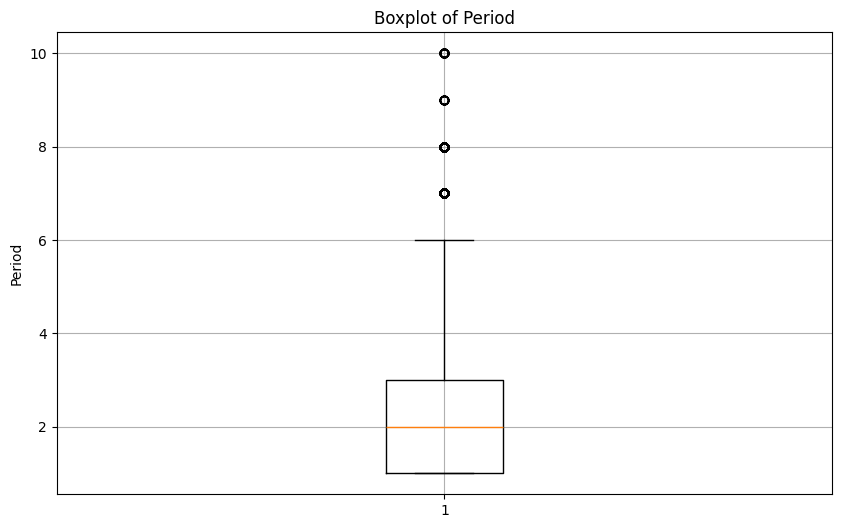

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df_upper_down['TRAVEL_PERIOD'])
plt.title('Boxplot of Period')
plt.ylabel('Period')
plt.grid(True)
plt.show()

In [ ]:
df_upper_down.groupby('TRAVEL_PERIOD')['budget'].mean()

,budget
TRAVEL_PERIOD,
1,61509.325391
2,170414.899702
3,258395.606179
4,396060.843205
5,452306.030598
6,473287.468421
7,616033.458090
8,691353.172757
9,279449.777778


In [ ]:
df_upper_down.shape

(38287, 22)

In [ ]:
df_upper_down = df_upper_down.loc[df_upper_down['TRAVEL_PERIOD'] < 9]

In [ ]:
df_upper_down.shape

(38204, 22)

In [ ]:
df_upper_down.groupby('TRAVEL_PERIOD')['budget'].mean()

,budget
TRAVEL_PERIOD,
1,61509.325391
2,170414.899702
3,258395.606179
4,396060.843205
5,452306.030598
6,473287.468421
7,616033.458090
8,691353.172757


### 각 기간에 해당하는 예산에 이상치를 대체

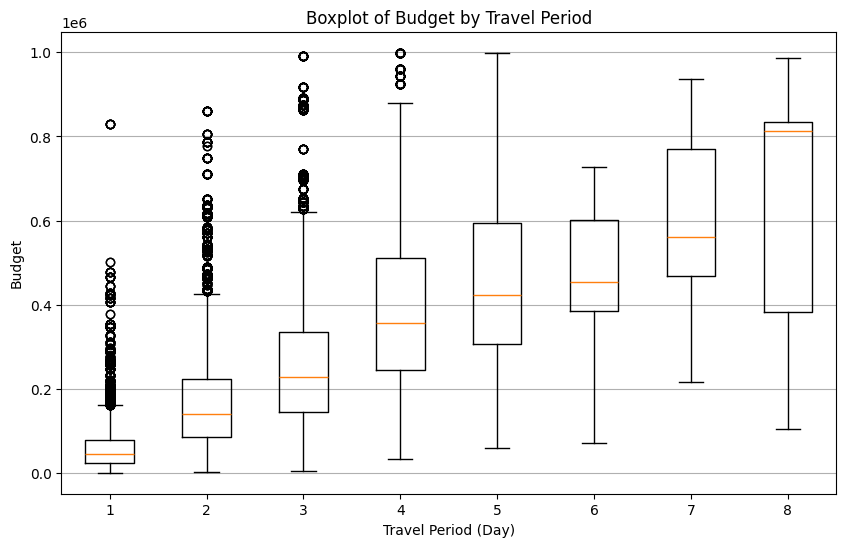

In [ ]:
# TRAVEL_PERIOD에 따른 budget 리스트 생성
groups = df_upper_down.groupby('TRAVEL_PERIOD')['budget'].apply(list)

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
plt.boxplot(groups, labels=groups.index)
plt.xlabel('Travel Period (Day)')
plt.ylabel('Budget')
plt.title('Boxplot of Budget by Travel Period')
plt.grid(axis='y')
plt.show()

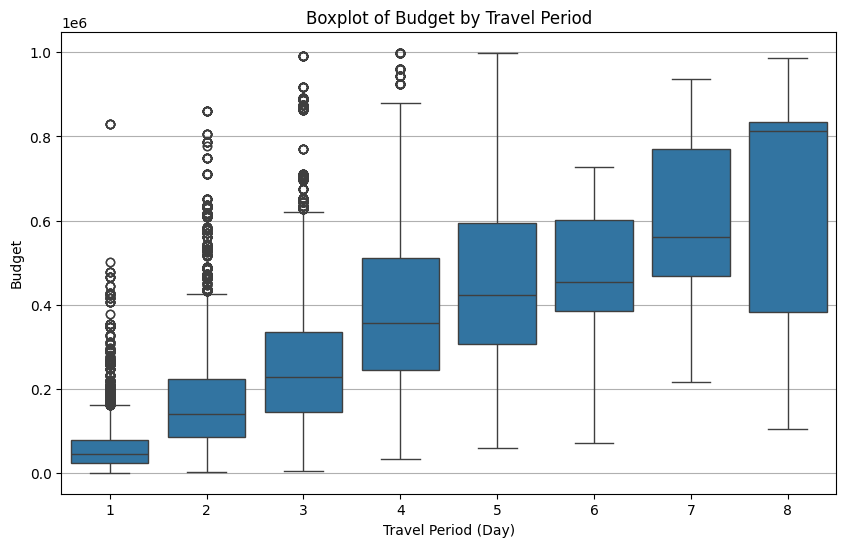

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_upper_down, x = 'TRAVEL_PERIOD', y = 'budget')
plt.xlabel('Travel Period (Day)')
plt.ylabel('Budget')
plt.title('Boxplot of Budget by Travel Period')
plt.grid(axis='y')
plt.show()

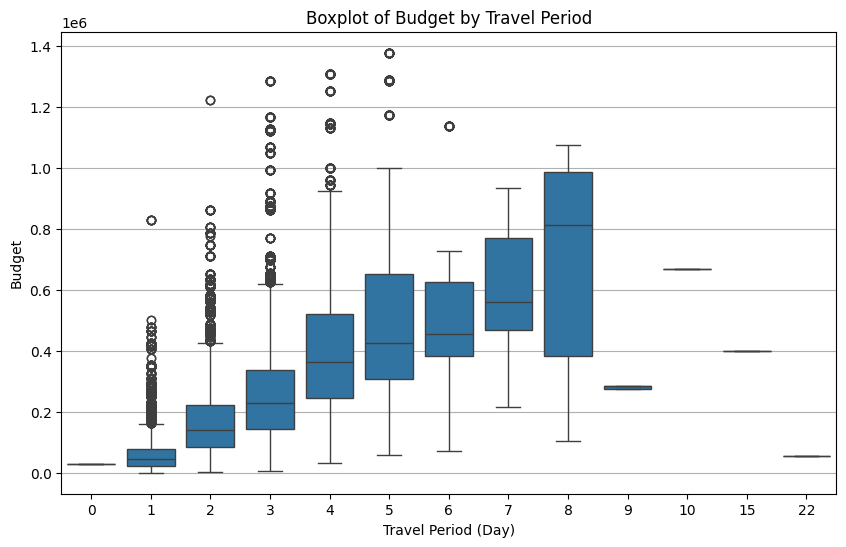

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df, x = 'TRAVEL_PERIOD', y = 'budget')
plt.xlabel('Travel Period (Day)')
plt.ylabel('Budget')
plt.title('Boxplot of Budget by Travel Period')
plt.grid(axis='y')
plt.show()

In [ ]:
a = df.groupby('TRAVEL_PERIOD')['budget'].sum()

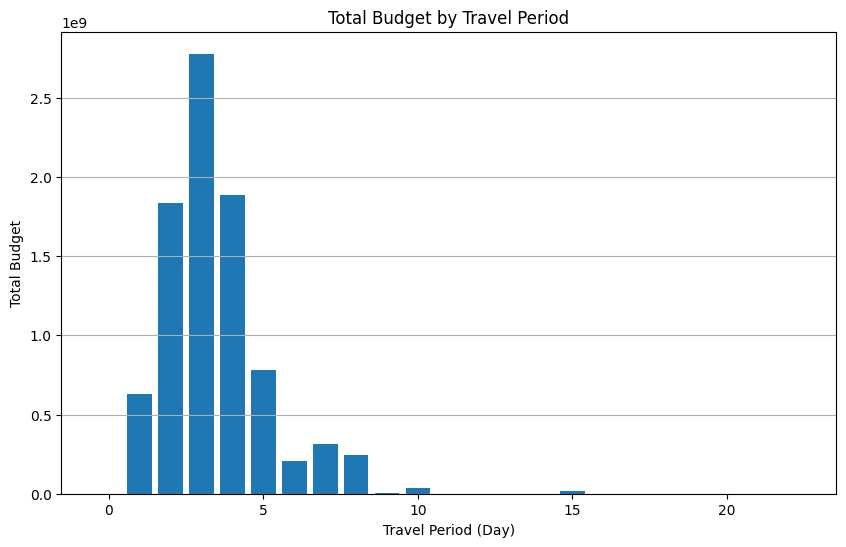

In [ ]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.bar(a.index, a.values)
plt.xlabel('Travel Period (Day)')
plt.ylabel('Total Budget')
plt.title('Total Budget by Travel Period')
plt.grid(axis='y')
plt.show()

In [ ]:
df['TRAVEL_PERIOD'].value_counts()

,count
TRAVEL_PERIOD,
2,10751
3,10346
1,10240
4,4486
5,1542
7,513
6,405
8,334
10,56


# 결측치 처리

In [ ]:
df.info()

In [ ]:
df.loc[df['MVMN_NM'].isnull()]

In [ ]:
df['MVMN_NM'] = df['MVMN_NM'].fillna('대중교통 등')

In [ ]:
df.info()

# 이상치 처리 함수, 결측치 처리 함수

In [ ]:
def outlier_processing(file_path, save_path):
    df = pd.read_csv(file_path)

    df = df.loc[(df['TRAVEL_PERIOD'] < 9) & (df['budget'] != 0) & (df['TRAVEL_PERIOD'] != 0)]

    df.to_csv(save_path, index=False)
    print('저장완료')

In [ ]:
# train
train_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(리커트척도변경).csv'
train_save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(이상_결측치).csv'
outlier_processing(train_file_path, train_save_path)

# test
test_file_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v2(리커트척도변경).csv'
test_save_path = '/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/test_v2(이상_결측치).csv'
outlier_processing(test_file_path, test_save_path)

In [ ]:
df_v2 = pd.read_csv('/content/drive/MyDrive/프로젝트응용(신동준, 이재훈, 최민규)/data/전처리/train_v2(이상_결측치).csv', index_col = 0)
df_v2.shape

In [ ]:
df_v2['budget'].describe()

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(df_v2['budget']) # 3배수 IQR
plt.title('Boxplot of Budget')
plt.ylabel('Budget')
plt.grid(True)
plt.show()